# Kollokasjoner for nøkkelord

Jeg foreslår disse ordene til stolper - hvis du Helge heller vil ha noen andre, så rop ut. Tanken er jo her å underbygge argumentasjonen som allerede er der i artikkelen om hvordan de to begrepene aggregerer meninger over tid. Lars skal utføre dette (pluss skrive tekst til metodedelen) senere i dag.

Helse:
- trivsel
- klima
- kosthold
- industri

Sykdom:
- skade
- lidelse
- feilernæring
- uførhet



In [123]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle
import numpy as np

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
nøkkelord = 'helse'

In [11]:
keyword_graph = nb.make_graph(nøkkelord, cutoff=16)

In [12]:
comm = gnl.community_dict(keyword_graph)

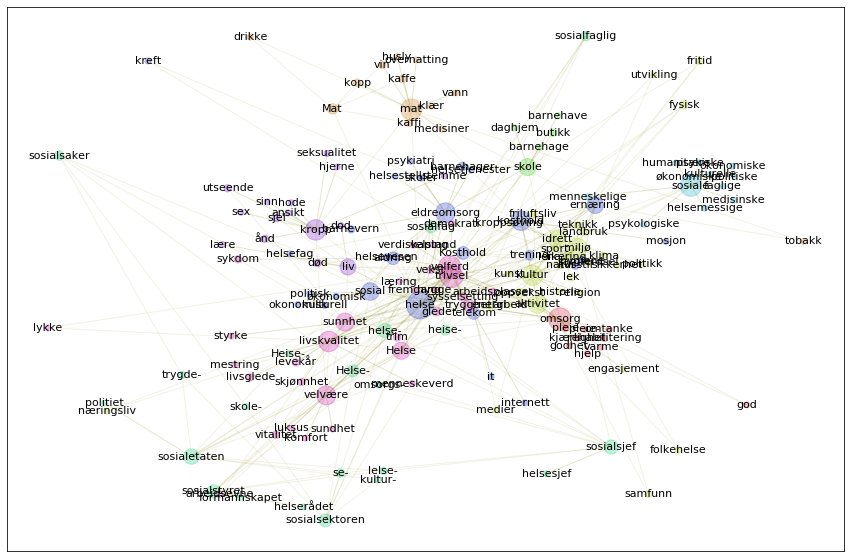

In [13]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [14]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [15]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(i)))

<span style='font-size:1.1em'>livsstil, skole, skjønnhet, lykke, trivsel, trygghet, vekst, helse-, velvære, eldreomsorg, sosiale, ernæring, trening, sosial, mat, Helse, velferd, arbeidsevne, samfunn, livskvalitet, aldring, aktivitet, kropp, tobakk, samferdsel, idrett, levekår, kosthold, omsorg, fysisk, utvikling, barnehager, natur, næring, næringsliv, kultur, helse, miljø, glede, hygiene, sunnhet, liv, fritid, Kosthold, sport, vitalitet</span>

<span style='font-size:1.1em'>Helse, velferd, helse, miljø, trygghet, livskvalitet, trivsel, aldring, sunnhet, velvære</span>

<span style='font-size:1.1em'>ernæring, trening, mat, kosthold, helse, aktivitet</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [16]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### kultur-miljø
<span style='font-size:1.1em'>kultur, miljø, aktivitet, idrett, oppvekst, næring, samferdsel, fysisk, lek, energi, friluftsliv, natur, landbruk, fritid, teknikk, historie, kunst, klima, sport, religion, samfunn, medier, politikk, arbeid, engasjement, utvikling, sikkerhet, leik, kroppsøving, næringsliv, folkehelse</span>
### skole-butikk
<span style='font-size:1.1em'>skole, butikk, barnehave, barnehage, daghjem</span>
### sosialetaten-helse-
<span style='font-size:1.1em'>sosialetaten, helse-, sosialsjef, sosialstyret, sosialsektoren, Helse-, sosialfag, sosialsaker, sosialfaglig, heise-, se-, lelse-, trygde-, helserådet, skole-, helsesjef, formannskapet, omsorgs-, Heise-, kultur-, politiet</span>
### sosiale-medisinske
<span style='font-size:1.1em'>sosiale, medisinske, helsemessige, okonomiske, kulturelle, faglige, menneskelige, psykiske, humanitære, økonomiske, psykologiske, politiske</span>
### helse-eldreomsorg
<span style='font-size:1.1em'>helse, eldreomsorg, kosthold, sosial, ernæring, aldring, Kosthold, telekom, trening, livsstil, barnehager, hygiene, barnevern, helsevesen, helsestell, mosjon, psykiatri, kulturell, skoler, kreft, helsefag, helsetjenester, okonomisk, it, økonomisk, internett, politisk</span>
### kropp-liv
<span style='font-size:1.1em'>kropp, liv, sjel, utseende, ånd, død, dod, stemme, seksualitet, lære, ansikt, sex, hode, sinn, hjerne</span>
### trivsel-velferd
<span style='font-size:1.1em'>trivsel, velferd, livskvalitet, velvære, sunnhet, Helse, trygghet, sysselsetting, glede, skjønnhet, vekst, sykdom, levekår, trim, arbeidsplasser, livsglede, vitalitet, velstand, luksus, menneskeverd, lykke, sundhet, demokrati, mestring, arbeidsevne, fremgang, hygge, styrke, komfort, læring, verdiskaping</span>
### omsorg-hjelp
<span style='font-size:1.1em'>omsorg, hjelp, pleie, varme, omtanke, god, godhet, rehabilitering, pleie-, kjærlighet</span>
### mat-Mat
<span style='font-size:1.1em'>mat, Mat, kaffi, kaffe, vin, kopp, tobakk, klær, husly, vann, overnatting, drikke, medisiner</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [17]:
reference = pd.read_json('../Avisdata/avis_agg.json')

In [18]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

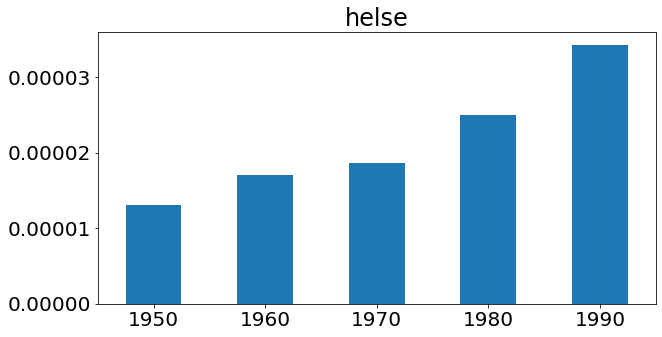

In [20]:
barchart(nøkkelord, reference);

In [21]:
keyword = nøkkelord

In [60]:
collocations = dict()
step = 1
for i in range(1950, 2000):
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)

In [61]:
colls = nb.frame(collocations)

In [62]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [63]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [64]:
agg = group_frames(colls)

In [65]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

In [66]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0678003,0.0636145,0.0626906,0.0639755,0.0677927
",",0.0422489,0.0412801,0.0360161,0.0375341,0.0360303
i,0.0245355,0.0246246,0.0241509,0.0223459,0.020813
og,0.0207927,0.021255,0.0188187,0.0187015,0.0167394
er,0.0112082,0.0110687,0.0112091,0.0109266,0.0102024
til,0.0116211,0.0112357,0.0110929,0.010449,0.00925942
det,0.011029,0.0104679,0.00987488,0.0087761,0.00727579
som,0.0100824,0.0100878,0.00975404,0.00902762,0.00786269
for,0.00917307,0.00942805,0.00930159,0.00870384,0.00758499
av,0.00976008,0.00965961,0.00918297,0.00824812,0.00709569


In [67]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0597081,0.0602275,0.0596702,0.0590842,0.05718
og,0.0396452,0.0450187,0.0456405,0.0472986,0.0494181
",",0.042128,0.0410497,0.0382607,0.0391128,0.0445184
i,0.0189866,0.0187019,0.0195229,0.021504,0.0219956
for,0.0176106,0.0170277,0.0160634,0.0168432,0.0192971
er,0.0146806,0.0135829,0.0144945,0.015305,0.0148016
til,0.0120081,0.0118579,0.0123203,0.0138693,0.0130209
som,0.0112257,0.011389,0.0122822,0.0112329,0.0103378
av,0.0109996,0.0108555,0.010521,0.0100671,0.00911325
på,0.00938176,0.0110189,0.0100142,0.0104373,0.00992223


pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

Sjekker det at assosiasjonene går ned utover, som virker litt rart - hvorfor det?

In [193]:
larger = lambda n, agg, col: n*min(agg[col][agg[col] > 0])

In [194]:
larger(10, agg, 1990)

2.3654194598328123e-06

In [481]:
pmi = pd.DataFrame()
for i in agg:
    cutoff = larger(12, agg, i)
    pmi[i] = agg[i][agg[i] > cutoff]/reference[i]
pmi = pmi.replace([np.inf], np.nan)
pmi = pmi.fillna(1)

In [482]:
#nb.normalize_corpus_dataframe(pmi2)

# Sammenligner med en referanse


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [483]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
STUGE,2268.23,1,1,1,1
Sinnets,1729.51,631.437,728.373,1399.25,254.086
Baitsjeff,1644.39,1,1,1,1
pirquet-,1638.16,1,1,1,1
Skolebarns,1519.02,1,1,1,1
Naturproduktet,1469.75,1,1,1,1
stasjonstjeneste,1465.19,1,1,1,1
maiblomst,1413.32,1,1,1,1
realskolepensum,1260.86,1,1,1,1
folkeskoleeksamen,1153.64,678.916,1,1,1


In [484]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
STUGE,2268.23,1,1,1,1
Sinnets,1729.51,631.437,728.373,1399.25,254.086
Baitsjeff,1644.39,1,1,1,1
pirquet-,1638.16,1,1,1,1
Skolebarns,1519.02,1,1,1,1
Naturproduktet,1469.75,1,1,1,1
stasjonstjeneste,1465.19,1,1,1,1
maiblomst,1413.32,1,1,1,1
realskolepensum,1260.86,1,1,1,1
folkeskoleeksamen,1153.64,678.916,1,1,1


In [485]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
arbeidshug,117.754,2968.63,1,1,1
farvesyn,828.496,2725.93,1,1,1
skolekunnskaper,1,2374.42,2089.27,1,1
levedagar,113.063,2266.95,76.2209,1,1
kroppsaktivitet,1,1894.81,1,1,1
legemøte,1,1593.74,1,1,1
kostholdsundersøkelser,1,1541.2,1,1,1
melks,1,1485.69,1,1,1
Øvre-Årdal,519.417,1470,1,1,1
Opptakelsesbetingelser,223.048,1453.82,1,1,1


In [486]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
frysebiler,1,1,5382.91,1,1
forlighet,1,1,5220.36,127.518,694.435
Grays,1,1,2549.33,1,1
Cøliaki,1,1,2524.82,1,1
soknadsberettiget,1,1,2524.82,1,1
Lenner,1,1,2249.38,1,1
skolekunnskaper,1,2374.42,2089.27,1,1
tjenestestillingen,1,1,1890.58,1,1
Barfotleger,1,1,1875.58,1,1
Aldring,1,1,1806.52,1,227.6


In [487]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
personallegen,1,1,1,3377.9,1
hverdagsmedisin,1,1,1,3316.16,1071.51
VARMEAPPARATER,1,1,1,2142.3,1
trollmannens,1,1,1,1958.67,1
almmnelig,1,1,1,1957.16,1
sykdomslære,1,1,1,1923.7,1
personalle,1,1,1,1904.27,1
SIKKERHETSRABATT,1,1,1,1864.29,1
sosial-sektoren,1,1,1,1806.76,117.47
oppdrettsfiskens,1,1,1,1757.78,1


In [488]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Spesialstoff,1,1,1,1,4214.75
reproduktiv,1,1,1,1,3910.57
spenningsfri,1,1,1,1,2249.09
livsløpsperspektiv,1,1,1,1,2109.7
hverdagsmedism,1,1,1,1,1933.03
IJF,1,1,1,1,1734.64
tuberkulinforhold,1,1,1,355.2,1733.66
Opptrappingsplan,1,1,1,1,1697.54
tilskriving,1,1,1,891.099,1488.48
folkeopplysnings-,1,1,1,1,1410.95


<br>
<br>

# Assosiasjoner og variasjon over år.

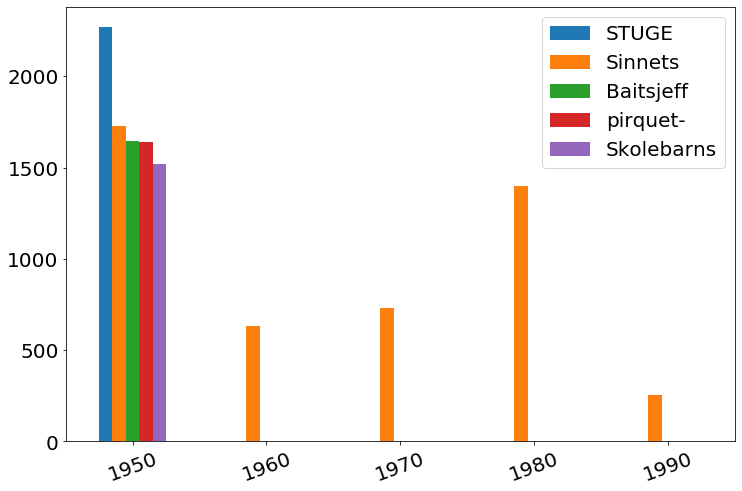

In [489]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [490]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

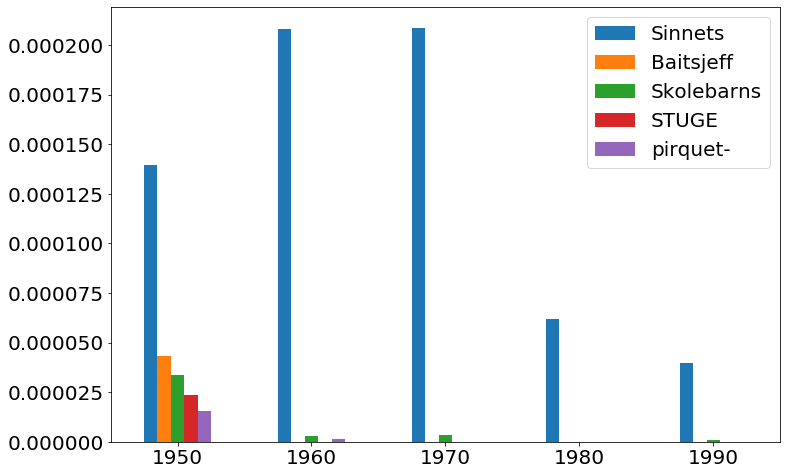

In [491]:
freq_assoc_val(agg, pmi, 0)

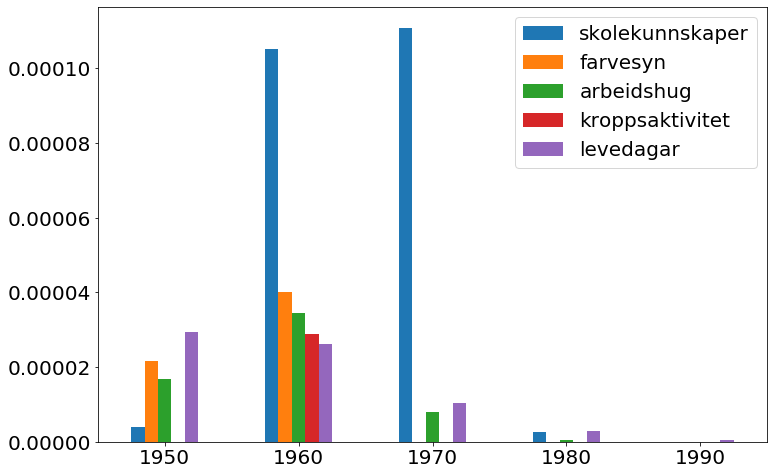

In [492]:
freq_assoc_val(agg, pmi, 1)

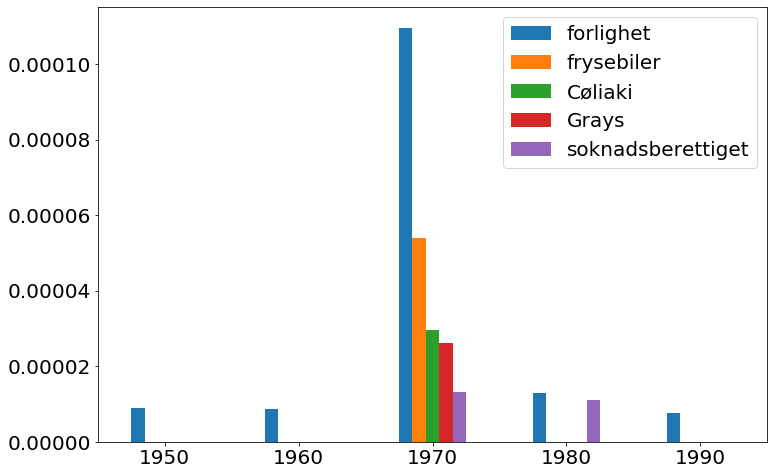

In [493]:
freq_assoc_val(agg, pmi, 2)

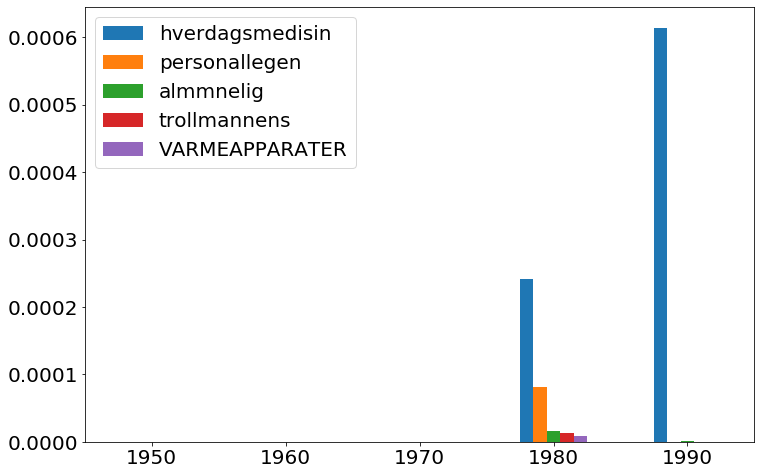

In [494]:
freq_assoc_val(agg, pmi, 3)

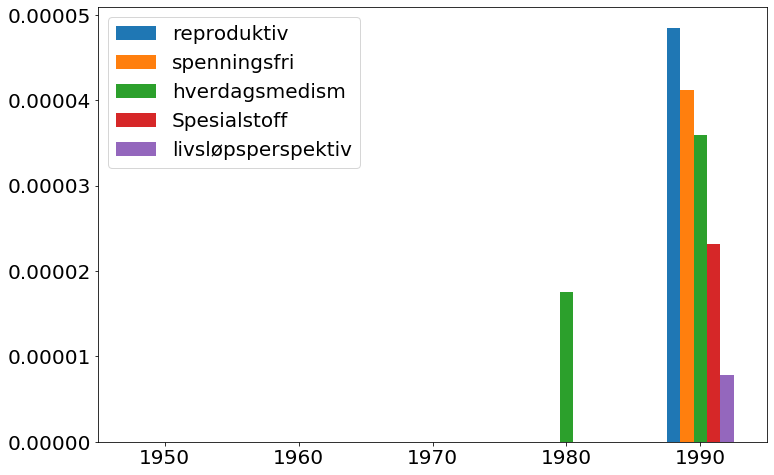

In [495]:
freq_assoc_val(agg, pmi, 4)

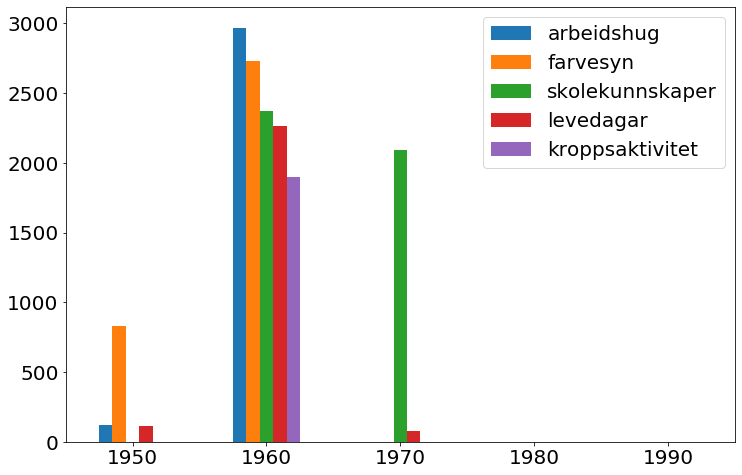

In [496]:
freq_assoc_val(pmi, pmi, 1)

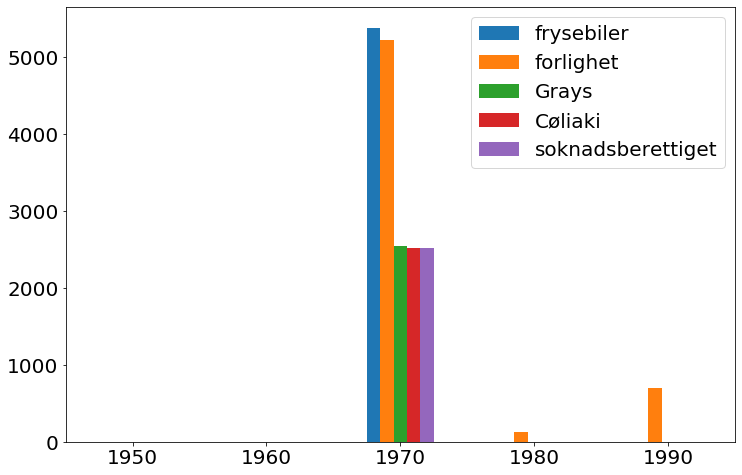

In [497]:
freq_assoc_val(pmi, pmi, 2)

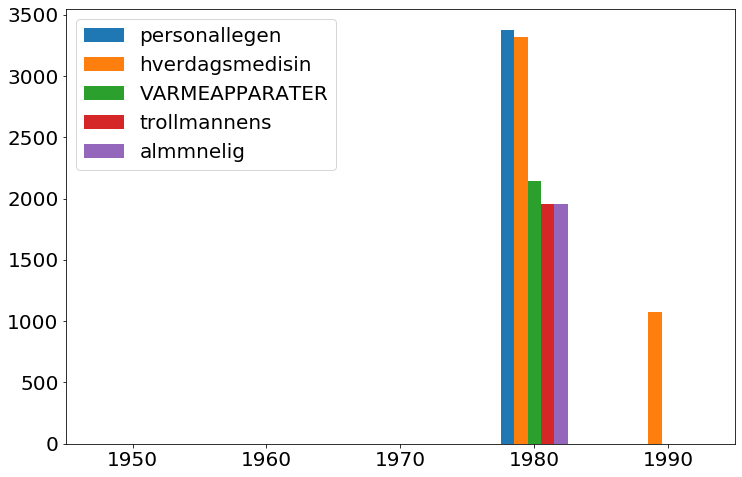

In [498]:
freq_assoc_val(pmi, pmi, 3)

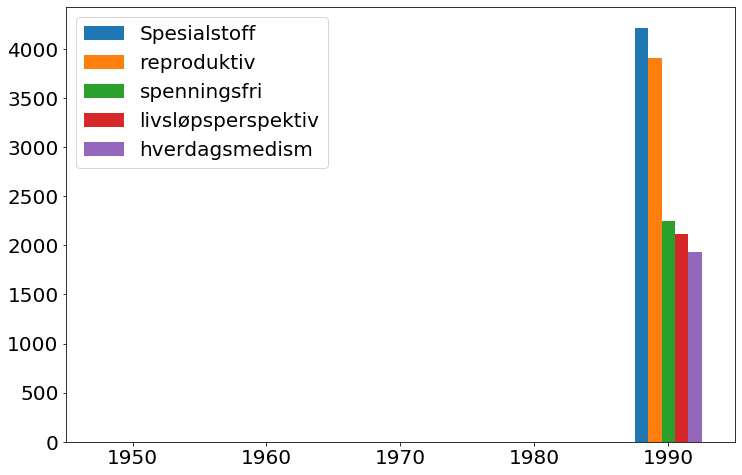

In [499]:
freq_assoc_val(pmi, pmi, 4)

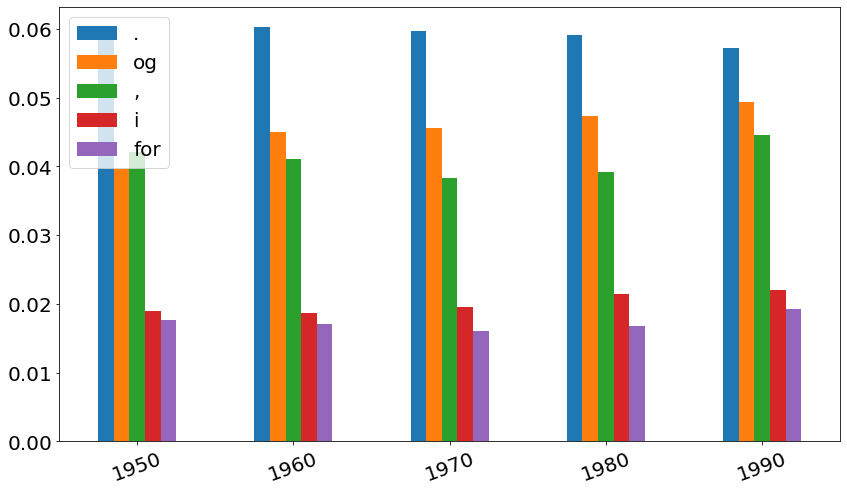

In [500]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));


# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [501]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Grays, Cøliaki, Lenner, Barfotleger, Aldring, TRAKTORSETER, Plettfri, Lyran, ARBEIDERGT, Heesch, GRAMMER, Uplettet, Grunnskule, 117.577, Hafizullah, Helseorganisasjons, Grammer, Sinnets, HUSLEGEN, Kosthold, Skoletid, Grunnskole, Fiber, Stasjoneringssted, Sommerbilde, HYSSB, Utskrevne, Amatørdyrkere, Akademiska, LBSK, Kievsenderen, Aldersgrensene, Vilkar, Minstealder, Innsenderspalte, Kost, Bauwens, Feltarbeiderne, Ødelegger, Besiktelsesmenn, Dedichen, OPPTAKSKRAV</span>

## subst
<span style='font-size:1.1em'>frysebiler, braketter, levedager, vandel, leveårene, førlighet, velferdssentralen, klasseforstander, aldring</span>
## unknown
<span style='font-size:1.1em'>forlighet, soknadsberettiget, skolekunnskaper, tjenestestillingen, forlig-, opplæringssentra, ferielovgivning, forflytningsplikt, royking, aprilnummeret, tapperivirksomhet, fargesans, skipsel.sert, opptaksåret, sinnets, innsenderspalte, kursplanar, fargedyktighet, elektronikk-, helsebegrep, svommedyktig, kyrnes, sentralanlegget, arbeidspsykologisk, søknadsberettiget, tennenes, helsebegrepet, soknadspapirer, erklaering, drape, sosialsentra, fremmedsprak, vandeL, klæring, kullgruber, sauegjeter, egenerklæring, åndsvakes, horsel, forstegangstjeneste, klasseforstandar, fottoy, partisjefens, kontrollmetoder</span>
## adj
<span style='font-size:1.1em'>skrantende, svømmedyktig, plettfri, mentale, mental</span>


# Hvordan utvikler ordene seg?

In [502]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

In [503]:
freqbarchart = lambda w, title='': agg.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

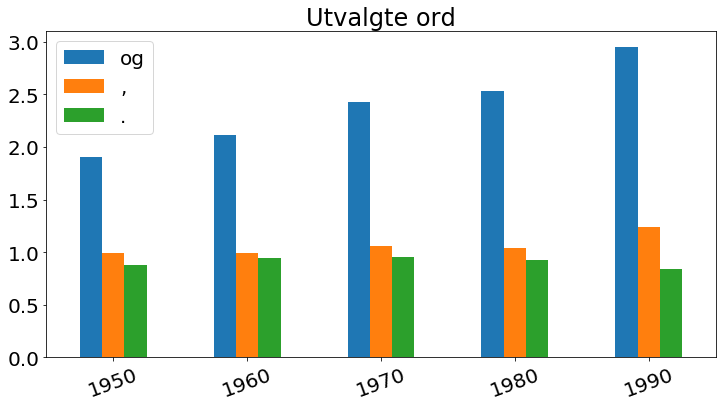

In [504]:
barchart([
    'og',',','.'
], 'Utvalgte ord');

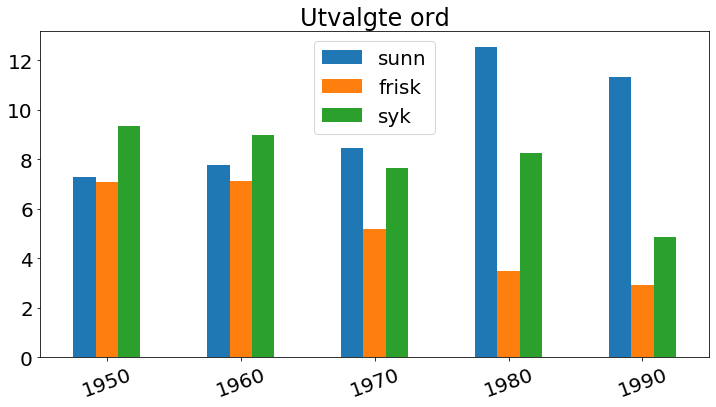

In [505]:
barchart('sunn frisk syk'.split(), 'Utvalgte ord');

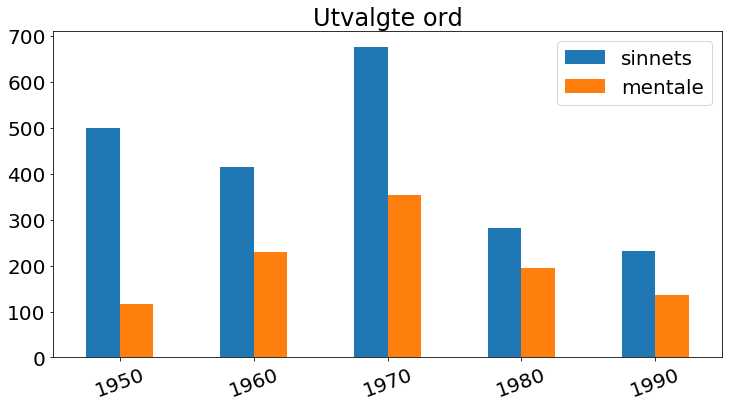

In [523]:
barchart('sinnets mentale'.split(), 'Utvalgte ord');

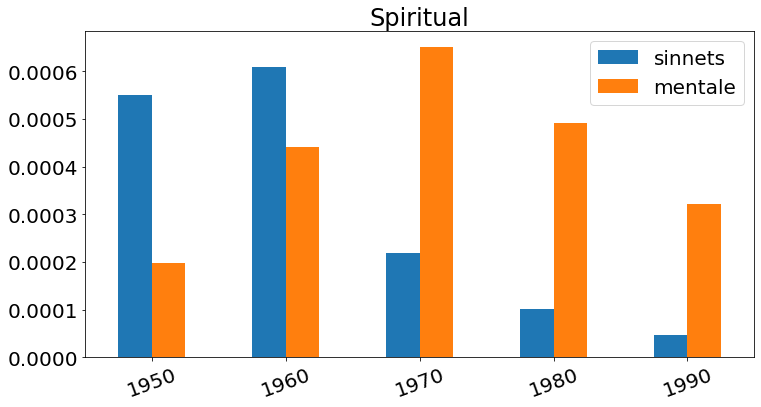

In [525]:
freqbarchart('sinnets mentale'.split(), 'Spiritual');

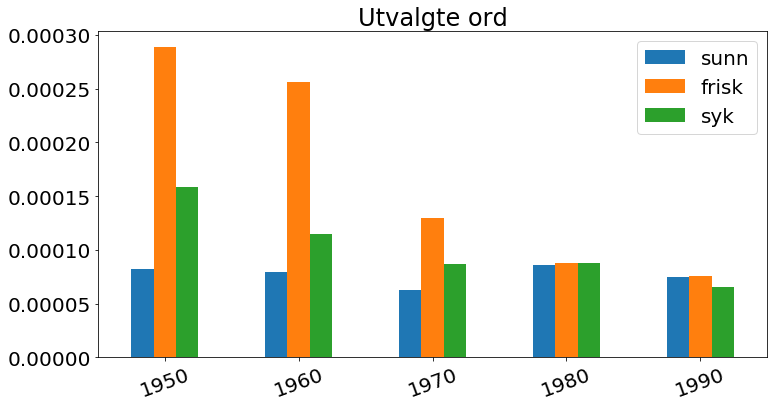

In [508]:
freqbarchart('sunn frisk syk'.split(), 'Utvalgte ord');

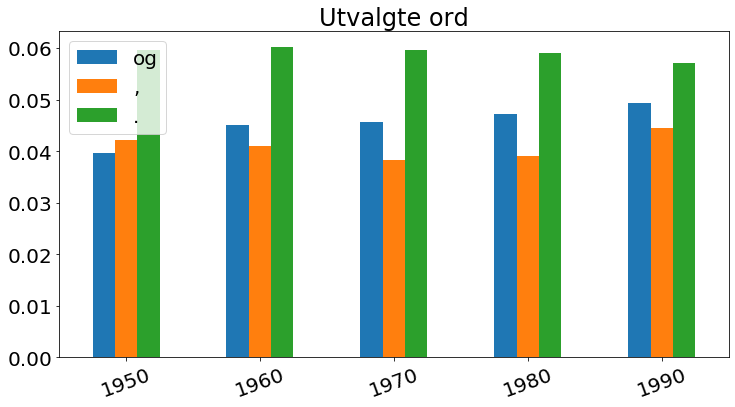

In [509]:
freqbarchart([
    'og',',','.'
], 'Utvalgte ord');

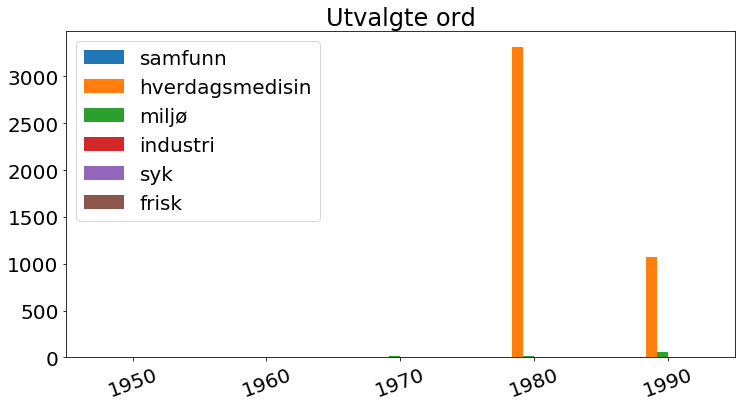

In [526]:
barchart([ 'samfunn','hverdagsmedisin', 'miljø', 'industri', 'syk', 'frisk'], 'Utvalgte ord');

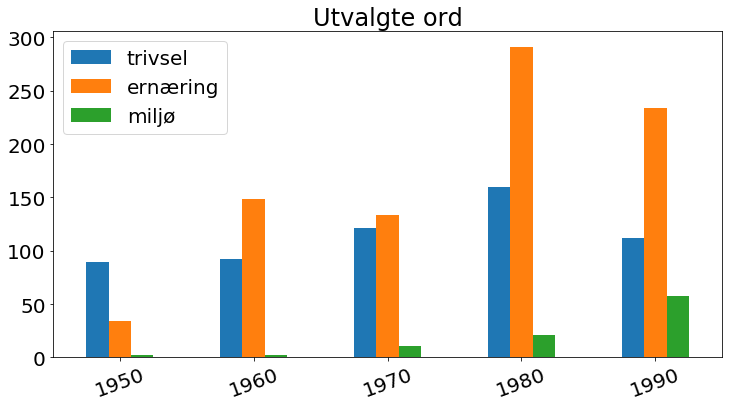

In [527]:
barchart([ 'trivsel', 'ernæring','miljø'], 'Utvalgte ord');

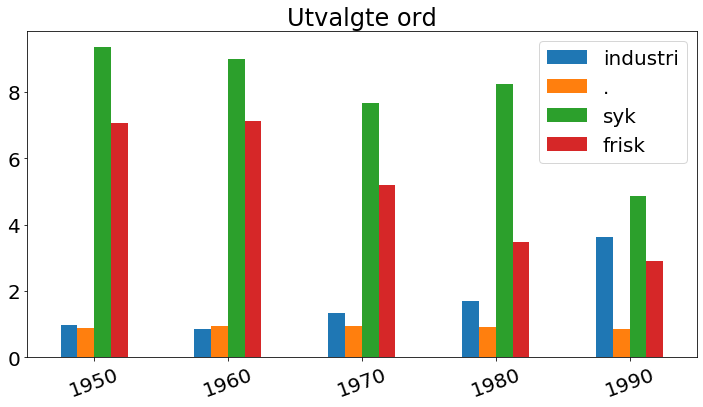

In [528]:
barchart([ 'industri','.','syk','frisk'], 'Utvalgte ord');

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [529]:
commchart = lambda x, part =(0,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

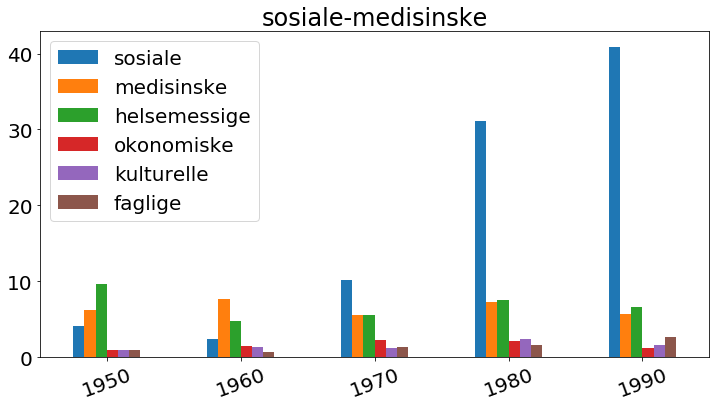

In [530]:
commchart(3)

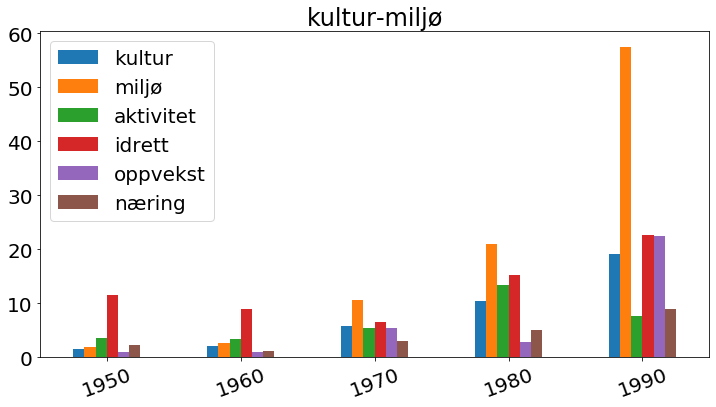

In [531]:
commchart(0)

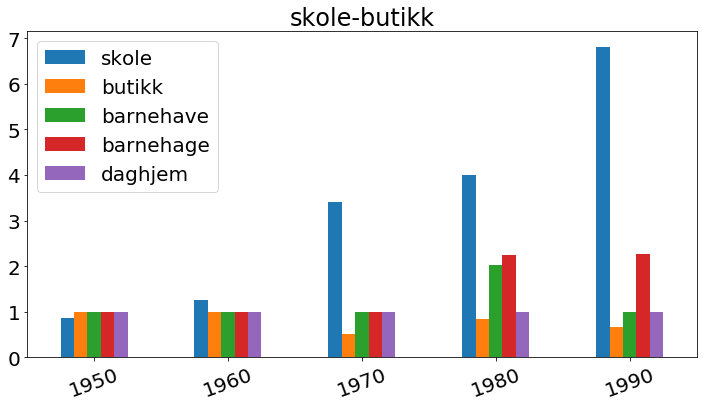

In [532]:
commchart(1)

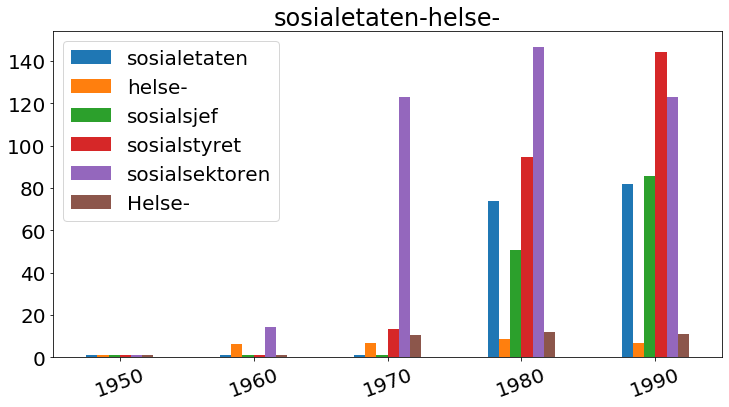

In [533]:
commchart(2)

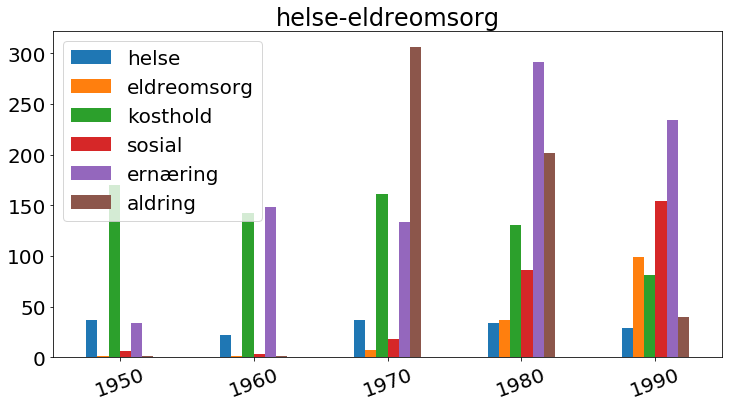

In [534]:
commchart(4)

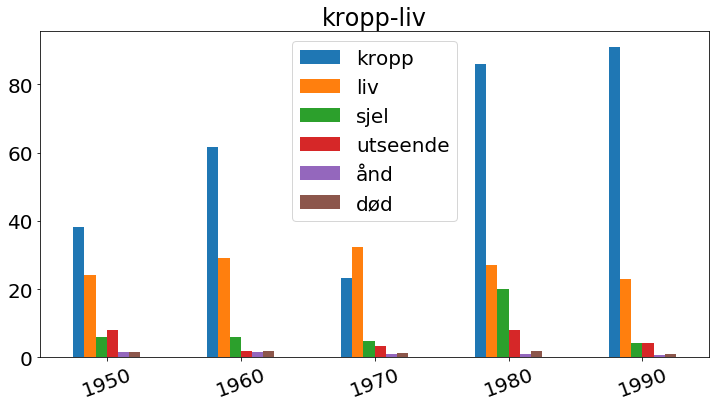

In [535]:
commchart(5)

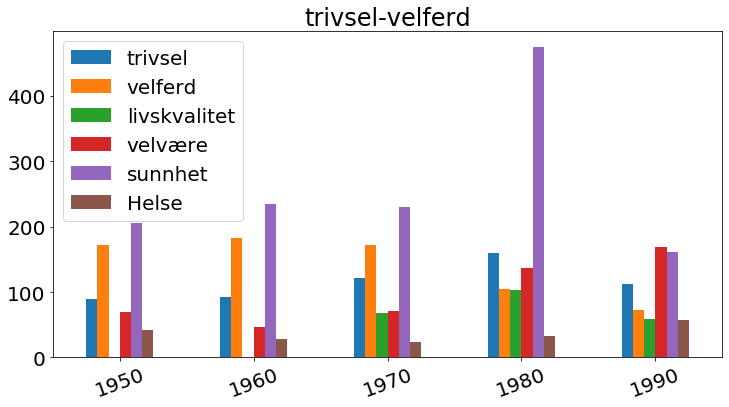

In [536]:
commchart(6)

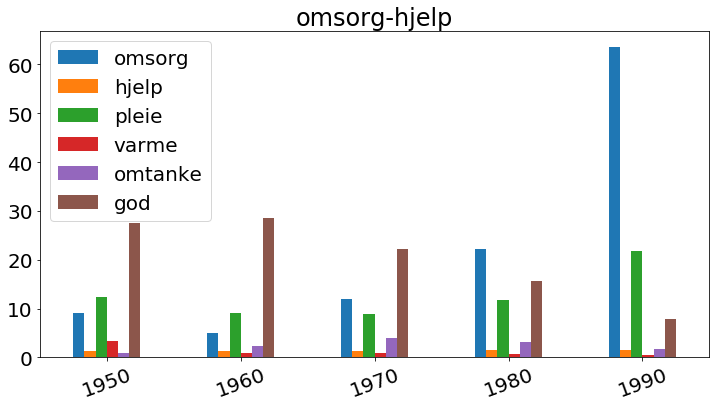

In [539]:
commchart(7)

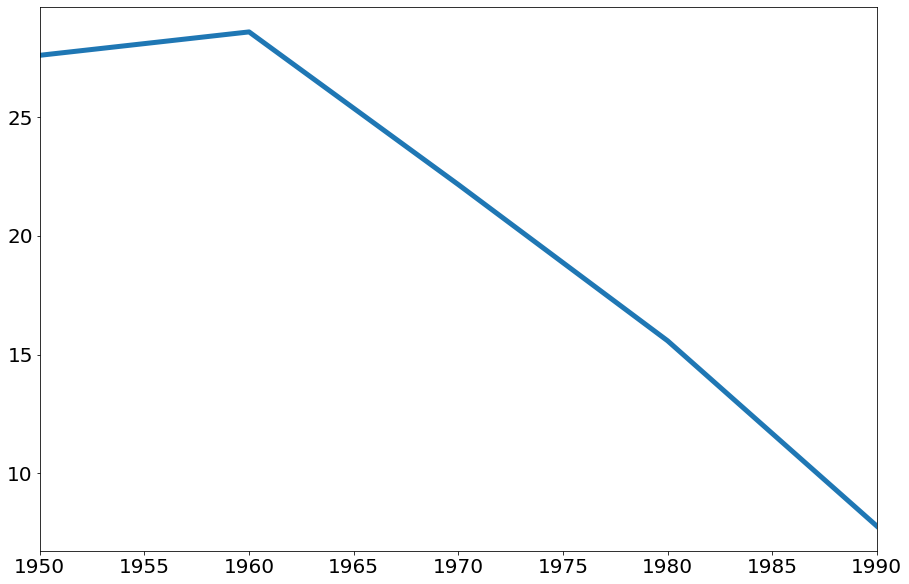

In [542]:
pmi.loc['god'].plot(lw=5)

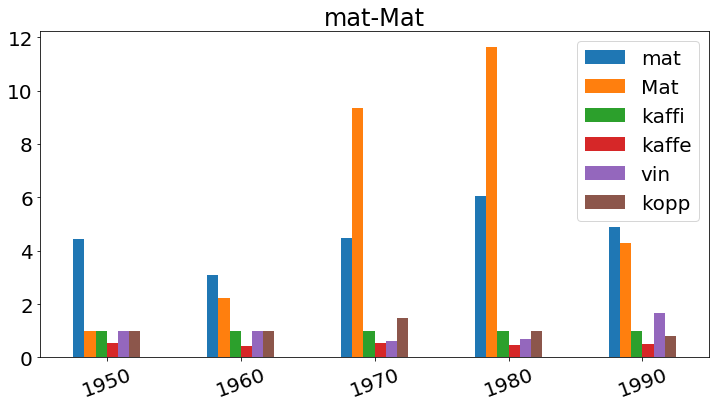

In [538]:
commchart(8)

In [596]:
def diff_df(df):
    diff = pd.DataFrame()
    for i in range(1, len(df.columns)):
        diff[df.columns[i]] = df[df.columns[i]]/df[df.columns[i-1]]
    diff = diff.replace([np.inf], np.nan)
    diff = diff.dropna()
    return diff

def growing_df(df):
    diff = pd.DataFrame()
    for i in range(1, len(df.columns)):
        diff[df.columns[i]] = df[df.columns[i]] > df[df.columns[i-1]]
    diff = diff.replace([np.inf], np.nan)
    diff = diff.dropna()
    return diff

def dropping_df(df):
    diff = pd.DataFrame()
    for i in range(1, len(df.columns)):
        diff[df.columns[i]] = df[df.columns[i]] < df[df.columns[i-1]]
    diff = diff.replace([np.inf], np.nan)
    diff = diff.dropna()
    return diff

In [ ]:
growing = growing_df(pmi).sum(axis=1)
dropping = dropping_df(pmi).sum(axis=1)


grow = pmi.loc[growing[growing >= 4].index]
growth_set = grow[(grow[1950] > 1.05) & (grow[1990] > 10)]

drop = pmi.loc[dropping[dropping >= 4].index]
drop_set = drop[(drop[1950] > 60) & (drop[1990] > 1)]

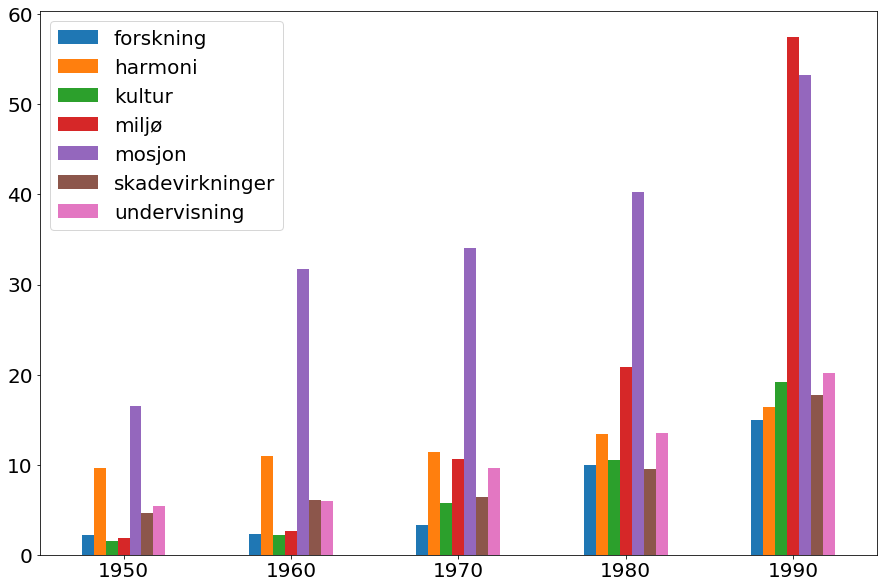

In [713]:
growth_set.transpose().plot(kind='bar', rot=0)

In [659]:
drop = pmi.loc[dropping[dropping >= 4].index]

drop_set = drop[(drop[1950] > 60) & (drop[1990] > 1)]

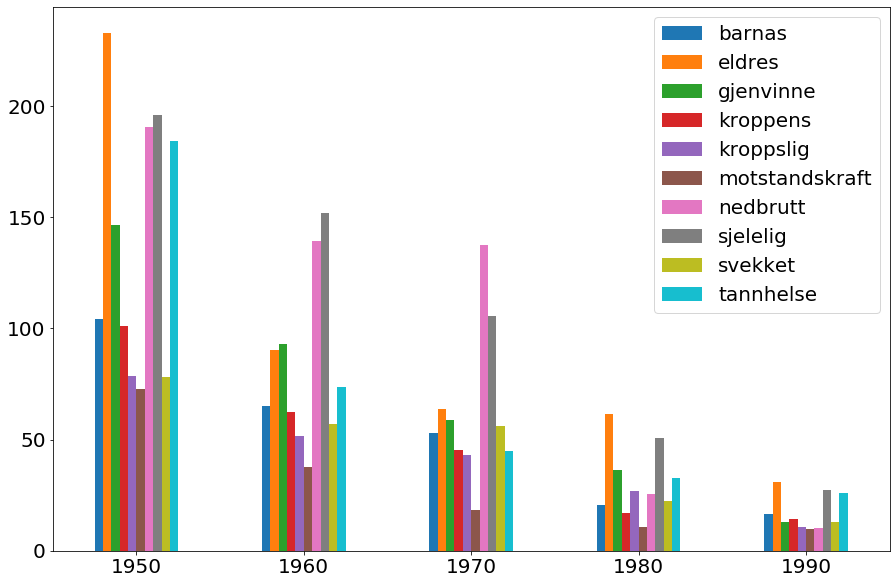

In [700]:
drop_set.transpose().plot(kind='bar',rot=0)

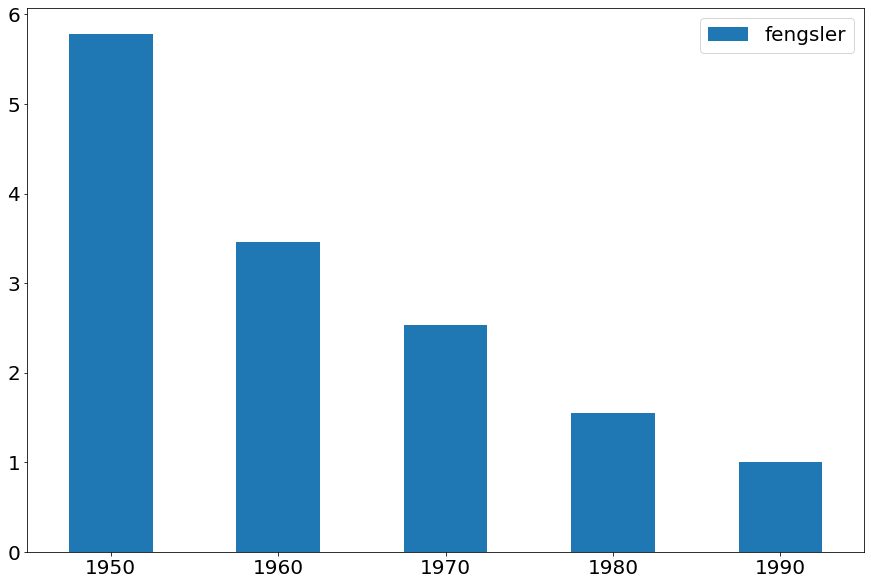

In [718]:
pmi.loc[[ 'fengsler']].transpose().plot(kind='bar', rot=0)

In [688]:
nb.word_paradigm('barna')

[['subs', ['barn', 'barna', 'barnene', 'barnet']]]

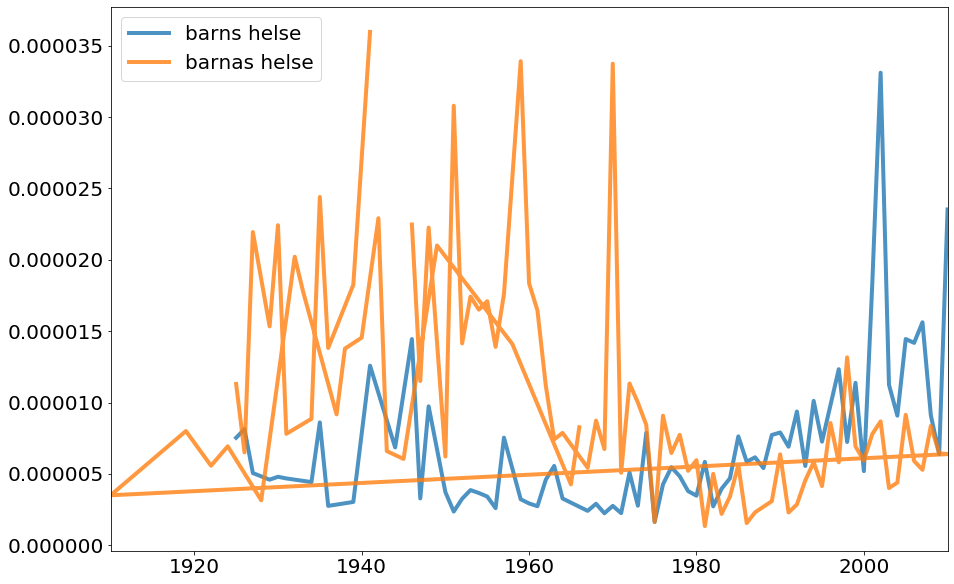

In [682]:
nb.nb_ngram('barns helse, barnas helse', corpus='avis', smooth=1).plot(lw=4,alpha=0.8)

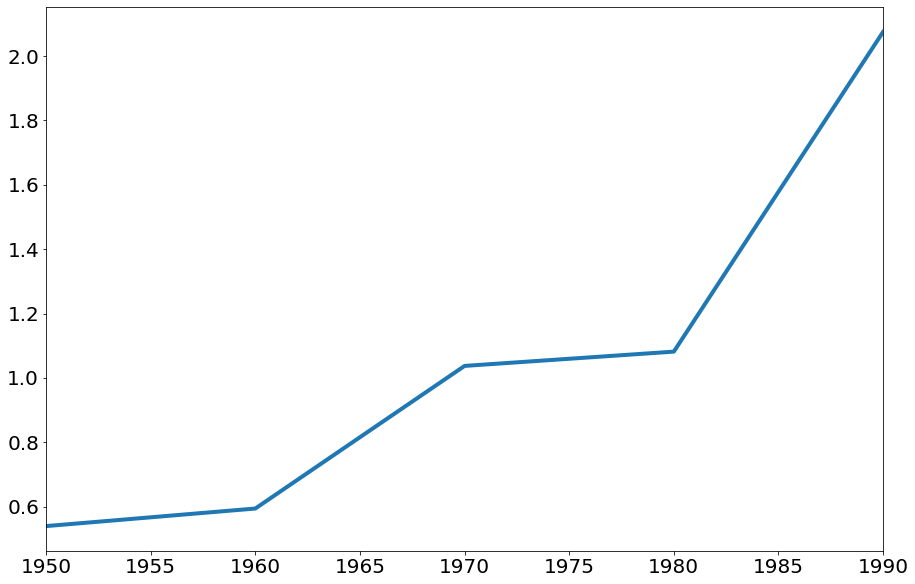

In [645]:
pmi.loc['ytre'].plot(lw=4)

In [604]:
growing[growing <= 0].index

Index(['.....', '......', '.......', '........', '.........', '..........',
       '...........', '............', '.............', '..............',
       ...
       '☆', '♀', '♂', '❖', 'ﬂskere', 'ﾫGﾫﾫ', 'ﾻ', '￥', '￸', '�'],
      dtype='object', length=8172139)

In [591]:
trues[trues == 4].index

Index(['37', 'Andre', 'Bergen', 'Dagsrevyen', 'Dette', 'Disse', 'Einar',
       'Fortsatt', 'Kjell', 'Knut',
       ...
       'valg', 'vedtatt', 'ven', 'venter', 'viss', 'viste', 'ytre', 'årig',
       'økonomiske', 'øvrige'],
      dtype='object', length=163)

In [582]:
t = pmi_diff
t = t.replace([1], np.nan)
t = t.dropna()


In [595]:
trues['syk']

1

In [594]:
pmi.loc['syk']

1950    9.354566
1960    8.987221
1970    7.654000
1980    8.247662
1990    4.859950
Name: syk, dtype: float64

In [583]:
t.sort_values(by = t.columns[1], ascending=False)[:30].style.background_gradient()

,1960,1970,1980,1990
Hygiene,0.00298396,70.4296,0.813396,0.0174559
Kost,0.554764,65.516,0.214607,0.170963
Mindre,0.605562,38.4866,0.0554607,0.845888
helsearbeidet,0.0525614,33.9357,0.281867,2.16697
orientering,0.52965,32.9209,0.127827,0.70728
spisevaner,0.0204441,26.626,0.0375573,15.6741
opptak,1.01936,20.0074,0.115423,0.454794
helsetilstand,0.0588515,18.8636,0.931347,0.765332
Barnets,0.0146802,16.6492,0.937103,0.479671
Arbeid,0.428315,15.6946,0.32891,0.273561
